<a href="https://colab.research.google.com/github/Pragya1712/Machine-Learning-Hand-Code/blob/main/Neural_Networks(Logistic_%26_Linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

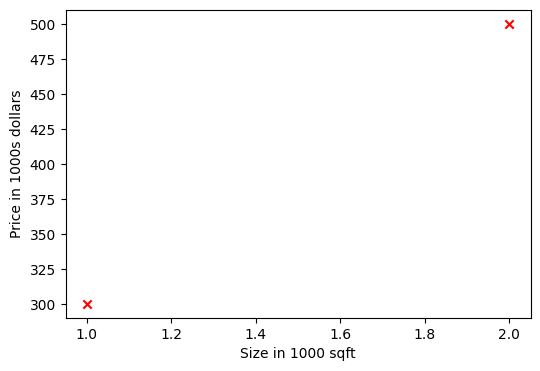

In [ ]:
# Linear Regression
x_train = np.array([[1.0],
                    [2.0]]
, dtype=np.float32)
y_train = np.array([[300.0,500.0]],dtype = np.float32)

# Plotting
fig , ax = plt.subplots(figsize = (6,4))
ax.scatter(x_train,y_train,marker='x',color='red')
ax.set_xlabel('Size in 1000 sqft')
ax.set_ylabel('Price in 1000s dollars')
plt.show()


In [ ]:
linear_layer1 =Dense(units=1, activation='linear')
a1 = linear_layer1(x_train) # creates weight internally
w , b = linear_layer1.get_weights()
print(f"Intial weight : {w}, Initaial bias : {b}")
print(a1)

Intial weight : [[-1.6933851]], Initaial bias : [0.]
tf.Tensor(
[[-1.6933851]
 [-3.3867702]], shape=(2, 1), dtype=float32)


In [ ]:
set_w = np.array([[200.0]])
set_b = np.array([100.0])
linear_layer1.set_weights([set_w,set_b])
w,b = linear_layer1.get_weights()
print(f"weight:{w} \n bias:{b}")

weight:[[200.]] 
 bias:[100.]


In [ ]:
# Predictions
prediction_tf = linear_layer1(x_train)
prediction_np = np.dot(x_train,w) + b
print("Tensorflow prediction: ",prediction_tf)
print("Numpy Ptrediction: ",prediction_np)

Tensorflow prediction:  tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)
Numpy Ptrediction:  [[300.]
 [500.]]


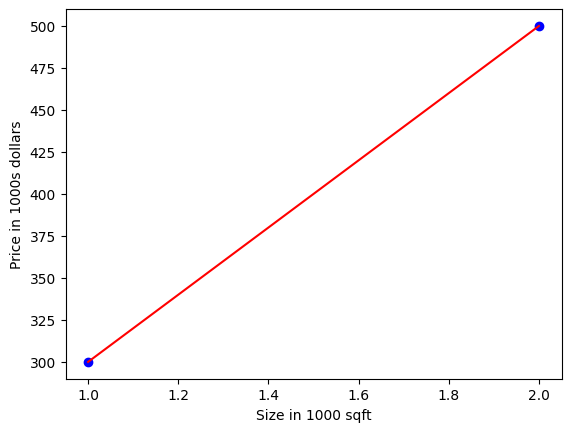

In [ ]:
plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,prediction_tf,color='red')
plt.xlabel("Size in 1000 sqft")
plt.ylabel("Price in 1000s dollars")
plt.show()

/tmp/ipython-input-1984759725.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


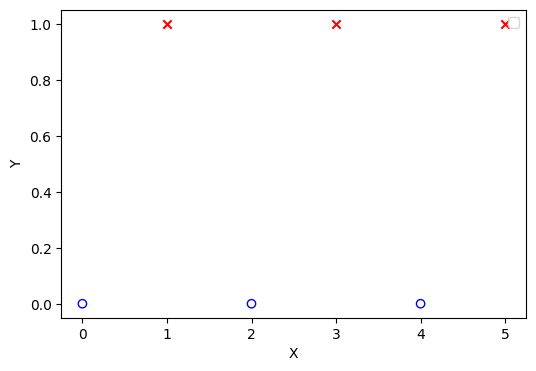

In [ ]:
# Logistic Regression
X_train = np.array([0.,1,2,3,4,5],dtype=np.float32).reshape(-1,1)
Y_train = np.array([0,1,0,1,0,1],dtype=np.float32).reshape(-1,1)
fig , ax = plt.subplots(figsize = (6,4))
# Scatter plot class 0
ax.scatter(X_train[Y_train==0],Y_train[Y_train==0],marker='o',facecolor='none',color='blue')
# Scatter plot class 1
ax.scatter(X_train[Y_train==1],Y_train[Y_train==1],marker='x',color='red')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()
plt.show()

In [ ]:
# create model
model = Sequential([Dense(units=1,activation='sigmoid',input_shape=(1,),name="L1")])
# We get the layer because we need to set weights we did not take the whole model
logistic_layer = model.get_layer("L1")
set_w = np.array([[2.0]])
set_b = np.array([-4.5])
logistic_layer.set_weights([set_w,set_b])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Check prediction
tf_predict = model.predict(X_train)
np_predict = 1 / (1 + np.exp(-(np.dot(X_train, set_w) + set_b)))

print("Tensorflow prediction: ",tf_predict)
print("Numpy prediction: ",np_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Tensorflow prediction:  [[0.01098694]
 [0.07585818]
 [0.37754068]
 [0.8175745 ]
 [0.97068775]
 [0.99592984]]
Numpy prediction:  [[0.01098694]
 [0.07585818]
 [0.37754067]
 [0.81757448]
 [0.97068777]
 [0.99592986]]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


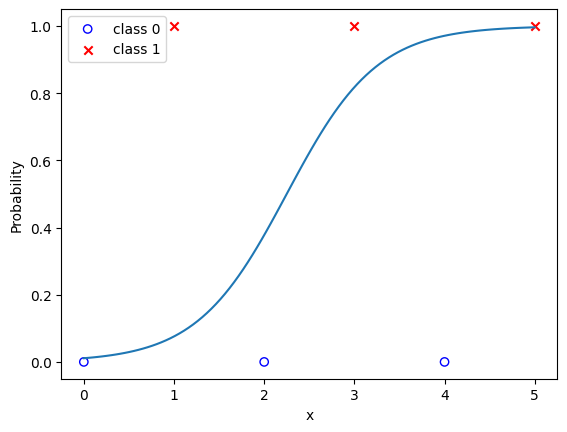

In [ ]:
# Plot the sigmoid curve
x_line = np.linspace(0,5,100).reshape(-1,1)
y_line = model.predict(x_line)
plt.scatter(X_train[Y_train==0],Y_train[Y_train==0],marker='o',facecolor='none',edgecolor='blue',label='class 0')
plt.scatter(X_train[Y_train==1],Y_train[Y_train==1],marker='x',color='red',label='class 1')
plt.plot(x_line,y_line,)
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.show()